In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("tweets.csv")

Import des tweets de Trump et Clinton en 2016

Source https://www.kaggle.com/benhamner/clinton-trump-tweets

In [2]:
#pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

Nettoyage du dataframe et tri par date.

In [3]:
tweets = pd.DataFrame()
tweets['Tweet ID'] = df['id']
tweets['person'] = df['handle']
tweets['content'] = df['text']
tweets['is_retweet'] = df['is_retweet']
tweets['Date'] = pd.to_datetime(df['time'])
tweets = tweets.set_index('Date').sort_index()
tweets.head()

Tweet ID           person  \
Date                                                       
2016-01-05 03:36:53  684216973815844866  realDonaldTrump   
2016-01-05 03:39:11  684217554861199360  realDonaldTrump   
2016-01-05 03:42:10  684218305100525569  realDonaldTrump   
2016-01-05 03:44:17  684218836569206784  realDonaldTrump   
2016-01-05 03:47:14  684219579548041218  realDonaldTrump   

                                                               content  \
Date                                                                     
2016-01-05 03:36:53  "@SalRiccobono: @realDonaldTrump @troyconway D...   
2016-01-05 03:39:11  "@iLoveiDevices: @EdwinRo47796972 @happyjack22...   
2016-01-05 03:42:10  "@ghosthunter_lol: Iowa key endorsement for @r...   
2016-01-05 03:44:17  "@marybnall01: @realDonaldTrump watched lowell...   
2016-01-05 03:47:14  "@lilredfrmkokomo: @realDonaldTrump My Faceboo...   

                     is_retweet  
Date                             
2016-01-05 03:36:53       False  
2016-01-05 03:39:11       False  
2016-01-05 03:42:10       False  
2016-01-05 03:44:17       False  
2016-01-05 03:47:14       False

In [4]:
#tweets = tweets[tweets['is_retweet'] == False]

Ajout d'une colonne sentiment

In [5]:
tweets['sentiment'] = tweets['content'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])

Sélection des 10 plus po

In [6]:
tweets_by_sentiment = tweets.sort_values('sentiment')
most_negatives = tweets_by_sentiment[:10]
most_positives = tweets_by_sentiment[-10:]

In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
most_positives

Tweet ID           person  \
Date                                                       
2016-08-28 02:08:10  769718184836472832  realDonaldTrump   
2016-01-29 13:42:58  693066810934063104  realDonaldTrump   
2016-01-11 14:18:34  686552786952130560  realDonaldTrump   
2016-07-27 02:27:14  758126571697963009  HillaryClinton    
2016-07-04 18:44:30  750037589118291968  HillaryClinton    
2016-07-23 02:41:28  756680601973952512  HillaryClinton    
2016-02-21 03:01:10  701240216745603073  realDonaldTrump   
2016-03-27 20:55:59  714194279409848320  realDonaldTrump   
2016-05-20 23:36:17  733803565060345856  realDonaldTrump   
2016-08-13 20:06:38  764553771879899137  realDonaldTrump   

                                                                                                                                                              content  \
Date                                                                                                                                                                    
2016-08-28 02:08:10  It was an honor to have the amazing Root family join me in Iowa. I have been so inspired by their courage &amp; bravery. https://t.co/P4qVGGUYVZ   
2016-01-29 13:42:58  Iowa was amazing last night. The event could not have worked out better. We raised $6,000,000 for our great vets. They were so happy &amp; proud   
2016-01-11 14:18:34  Congratulations to my friend @TheSlyStallone on winning a #GoldenGlobe. A wonderful guy- who has created something special- well deserved!         
2016-07-27 02:27:14  “I married my best friend. I was still in awe of…how smart and strong and loving and caring she was.” —@BillClinton on Hillary                     
2016-07-04 18:44:30  Happy Fourth of July! Today let's celebrate the best of America—our freedom, diversity, and the values we share. -H https://t.co/C6Mdt4iVg5        
2016-07-23 02:41:28  He's humble.He's incredibly smart.He's a joyful warrior,a kind &amp; thoughtful person.He'll be a wonderful VP! Congrats to my friend. M. I. Z!    
2016-02-21 03:01:10  What a great night. Thank you South Carolina, a special place with truly amazing people! LOVE                                                      
2016-03-27 20:55:59  Why can't the pundits be honest? Hopefully we are all looking for a strong and great country again. I will make it strong and great!  JOBS!        
2016-05-20 23:36:17  @montgomeriefdn  Colin, great to have you at Trump Turnberry. So proud of you and your GREAT playing! You made winning MAJORS look easy!           
2016-08-13 20:06:38  "@PaulaDuvall2: We're all enjoying you, as well, Mr. T.! You've inspired Hope and a Positive Spirit throughout America! God bless you!" Nice       

                     is_retweet  sentiment  
Date                                        
2016-08-28 02:08:10  False       0.9624     
2016-01-29 13:42:58  False       0.9633     
2016-01-11 14:18:34  False       0.9652     
2016-07-27 02:27:14  False       0.9661     
2016-07-04 18:44:30  False       0.9682     
2016-07-23 02:41:28  True        0.9685     
2016-02-21 03:01:10  False       0.9691     
2016-03-27 20:55:59  False       0.9697     
2016-05-20 23:36:17  False       0.9706     
2016-08-13 20:06:38  False       0.9735

In [9]:
most_negatives

Tweet ID           person  \
Date                                                       
2016-06-30 18:10:40  748579523474632705  HillaryClinton    
2016-07-29 13:53:31  759024055123009536  realDonaldTrump   
2016-07-01 15:51:46  748906952713875456  realDonaldTrump   
2016-02-12 04:20:33  697998702477242369  realDonaldTrump   
2016-06-18 00:13:43  743959844315602945  HillaryClinton    
2016-07-03 20:28:55  749701475350286341  HillaryClinton    
2016-03-22 18:21:24  712343435387260928  realDonaldTrump   
2016-06-13 17:34:01  742409706359119872  HillaryClinton    
2016-07-14 22:40:31  753720863606775809  realDonaldTrump   
2016-03-15 04:21:20  709595310939643905  realDonaldTrump   

                                                                                                                                                              content  \
Date                                                                                                                                                                    
2016-06-30 18:10:40  Heartbroken by the heinous terrorist murder of 13-year-old Hallel Ariel. No child should be in danger in her home. https://t.co/xpN5J7871S         
2016-07-29 13:53:31  General John Allen, who I never met but spoke against me last night, failed badly in his fight against ISIS. His record = BAD  #NeverHillary       
2016-07-01 15:51:46  Yet another terrorist attack today in Israel -- a father, shot at by a Palestinian terrorist, was killed while:\nhttps://t.co/Cv1HzKVbiT           
2016-02-12 04:20:33  Lying Cruz put out a statement, “Trump &amp; Rubio are w/Obama on gay marriage." Cruz is the worst liar, crazy or very dishonest. Perhaps all 3?   
2016-06-18 00:13:43  Gun violence and hate aren't isolated—homophobia in Orlando, racism in Charleston. We need to fight them together. https://t.co/HcBJzknBz7         
2016-07-03 20:28:55  Today's attack in Baghdad is another horrific example of ISIS's savagery. We will defeat them. My prayers are with the victims' families. -H       
2016-03-22 18:21:24  My heart &amp; prayers go out to all of the victims of the terrible #Brussels tragedy. This madness must be stopped, and I will stop it.           
2016-06-13 17:34:01  The terrorist in Orlando targeted LGBT Americans out of hatred and bigotry. \n\nAn attack on any American is an attack on all Americans.           
2016-07-14 22:40:31  Another horrific attack, this time in Nice, France. Many dead and injured. When will we learn? It is only getting worse.                           
2016-03-15 04:21:20  Rubio is weak on illegal immigration, with the worst voting record in the U.S. Senate in many years. He will never MAKE AMERICA GREAT AGAIN!       

                     is_retweet  sentiment  
Date                                        
2016-06-30 18:10:40  True       -0.9652     
2016-07-29 13:53:31  False      -0.9631     
2016-07-01 15:51:46  False      -0.9584     
2016-02-12 04:20:33  False      -0.9531     
2016-06-18 00:13:43  False      -0.9509     
2016-07-03 20:28:55  False      -0.9460     
2016-03-22 18:21:24  False      -0.9458     
2016-06-13 17:34:01  False      -0.9442     
2016-07-14 22:40:31  False      -0.9413     
2016-03-15 04:21:20  False      -0.9406

C:\Users\sylba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  
C:\Users\sylba\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  after removing the cwd from sys.path.
C:\Users\sylba\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


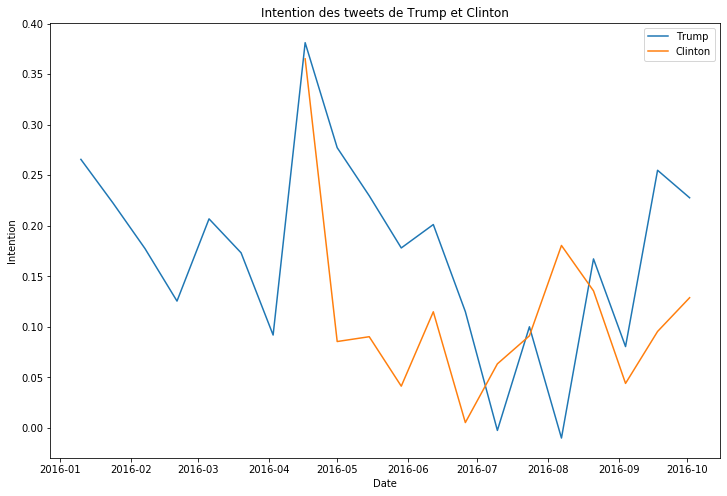

In [10]:
tweets_trump = tweets[tweets['person'] == 'realDonaldTrump']
tweets_trump_grouped = tweets_trump.groupby(pd.TimeGrouper(freq='2w'))[['sentiment']].mean()
tweets_clinton = tweets[tweets['person'] == 'HillaryClinton']
tweets_clinton_grouped = tweets_clinton.groupby(pd.TimeGrouper(freq='2w'))[['sentiment']].mean()

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(tweets_trump_grouped.index.values,
        tweets_trump_grouped['sentiment'].values,
        '-', label='Trump')
ax.plot(tweets_clinton_grouped.index.values,
        tweets_clinton_grouped['sentiment'].values,
        '-', label = 'Clinton')
ax.set(xlabel="Date", ylabel="Intention",
       title="Intention des tweets de Trump et Clinton")
ax.legend()

plt.show()